# 0.1 Libs

In [72]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# 0.2 Data

In [6]:
cwd = os.getcwd()
df = pd.read_csv(cwd + '\\..\\..\\Data\\Boston.csv')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# 0.3 Fazer uma regressão linear usando lstat como predictor e medv como target

In [64]:
# Renomeando os dados para x_train e y_train
X_train = df['lstat']
Y_train = df['medv']

# Dando reshape nos dados para poder encaixar na regressão
X_trainL = X_train.values.reshape(-1, 1)
Y_trainL = Y_train.values.reshape(-1, 1)

# Fittando o xtrain e ytrain no modelo de regressão linear
Model = LinearRegression().fit(X_trainL, Y_trainL)

# Printando os dados
print("Coefficients: ", Model.coef_)
print("Intercept: ", Model.intercept_)

#Usando modelstats para pegar dados como P-value, F-statistics e R²
X_train = sm.add_constant(X_train)

#Fit do modelo
Model = sm.OLS(Y_train, X_train).fit() 

#Embelezando o print do confidence interval
confidence_interval = Model.conf_int()
confidence_interval.columns = ['Menor valor', 'Maior valor']

#Printando os valores pedidos no livro
print("\nR-squared: ", Model.rsquared)
print("F-statistic: ", Model.fvalue)
print("p-value (F-statistic): ", Model.f_pvalue)
print("\nCondidence interval:\n", residual_values)

Coefficients:  [[-0.95004935]]
Intercept:  [34.55384088]

R-squared:  0.5441462975864797
F-statistic:  601.6178711098953
p-value (F-statistic):  5.081103394388134e-88

Condidence interval:
        Menor valor  Maior valor
const    33.448457    35.659225
lstat    -1.026148    -0.873951


# 0.4 Plotando Regressão linear com a linha

Text(0, 0.5, 'MEDV')

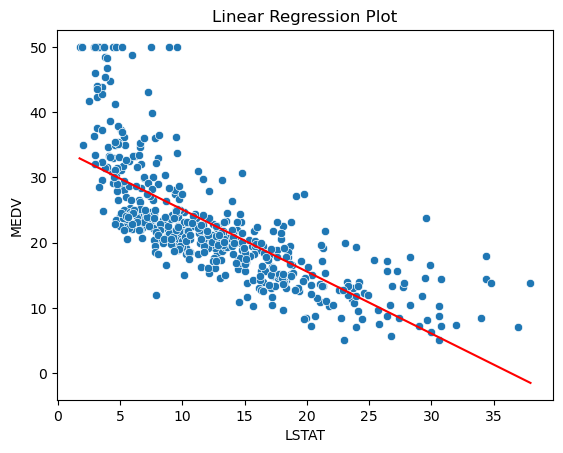

In [73]:
df['Pred'] = Model.predict(X_train)

sns.scatterplot(x='lstat', y='medv', data=df)
sns.lineplot(x='lstat', y='Pred', data=df, color='red')
plt.title('Linear Regression Plot')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

# 0.5 Plotando um Pairplot dos dados